# Programación 201

### Ejercicio 1

Carga los datos desde el archivo `netflixtitles.csv` , que puedes encontrar en la carpeta `data`, en un *dataframe*. Este conjunto de datos recoje información sobre películas y séries de TV de Netflix (https://www.kaggle.com/shivamb/netflix-shows) hasta el 2019.  

Muestra el número de filas del *dataframe* y los nombres de las columnas.

*Consideraciones:*

*  Muestra únicamente la información pedida en el enunciado.


In [11]:
import numpy as np
import pandas as pd

In [12]:
df = pd.read_csv("https://raw.githubusercontent.com/IsabelRodRob13/The_Bridge_School_DataScience_PT/main/02_DataAnalysis/dataset/netflixtitles.csv",
                 sep=",", index_col=False)
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99,Comedies,When nerdy high schooler Dani finally attracts...


In [13]:
number_of_rows=len(df.index)
number_of_rows

6234

In [14]:
names_columns=df.columns
names_columns


Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

### Ejercicio 2

Agrupa los datos cargados en el ejercicio 1 por **año** y, para cada año, muestra el número total de películas (*Movies*) y series de TV (*TV Show*) por separado. 

**Nota:** Al Notebook de teoría hemos visto cómo calcular la media de una agrupación de datos. Para resolver este ejercicio necesitarás investigar cómo contar (*count*) todos los valores de una columna en una agrupación. Te puede ser de utilidad la función [aggregate](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.aggregate.html) de pandas, la que nos permite aplicar diferentes funciones a una columna en un ```groupby```.


In [15]:
df1=df.groupby(['release_year','type']).agg({'type':['count']})
df1

,,type
,,count
release_year,type,
1925,TV Show,1
1942,Movie,2
1943,Movie,3
1944,Movie,3
1945,Movie,3
...,...,...
2018,TV Show,417
2019,Movie,400


### Ejercicio 3

Muestra las películas estrenadas el _2019_ que tienen una duración superior a _100_ minutos. 

**Nota:** Al Notebook de teoría hemos visto operaciones básicas de filtrado. Para resolver este ejercicio necesitarás investigar cómo aplicar condiciones más complejas. 

**Nota 2:** Los valores de la columna de duración (*duration*) son strings, ya que combinan números y letras. Por lo tanto, se tienen que transformar a int una vez se haya construido el subset de datos de películas. Te puede ser de utilidad la función [astype](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.astype.html) de pandas.
 


df3=df.loc[ 
           (df.release_year==2019) &(df.duration>100),
          ['release_year','type','title','duration']
          ]
df3

In [16]:
df3=df.loc[ 
           (df.release_year==2019)& (df.type=='Movie'),
          ['release_year','type','title','duration']
          ]
df3

,release_year,type,title,duration
0,2019,Movie,Norm of the North: King Sized Adventure,90
35,2019,Movie,Article 15,125
38,2019,Movie,Kill Me If You Dare,100
44,2019,Movie,American Factory: A Conversation with the Obamas,10
57,2019,Movie,The World We Make,108
...,...,...,...,...
5451,2019,Movie,Francesco De Carlo: Cose di Questo Mondo,61
5455,2019,Movie,The Perfect Date,91
5463,2019,Movie,Liss Pereira: Reteniendo líquidos,59
5464,2019,Movie,The Silence,91


In [17]:
df3.duration=df3.duration.astype('int64')
after=type(df3.duration[0])
after

numpy.int64

In [18]:
df33=df3.loc[(df3.duration >= 100)]
df33

,release_year,type,title,duration
35,2019,Movie,Article 15,125
38,2019,Movie,Kill Me If You Dare,100
57,2019,Movie,The World We Make,108
102,2019,Movie,In the Shadow of the Moon,116
109,2019,Movie,Malaal,133
...,...,...,...,...
5347,2019,Movie,Ek Ladki Ko Dekha Toh Aisa Laga,120
5359,2019,Movie,Music Teacher,102
5365,2019,Movie,The Ruthless,111
5385,2019,Movie,HOMECOMING: A film by Beyoncé,138


In [19]:
df3.duration >= 100

0       False
35       True
38       True
44      False
57       True
        ...  
5451    False
5455    False
5463    False
5464    False
5469     True
Name: duration, Length: 400, dtype: bool

### Ejercicio 4

Queremos buscar aquellos países donde se estrenaron más de 10 películas al año. Debes mostrar por pantalla el **año**, el **nombre del país** y el **número total de películas** estrenadas en el año correspondiente.

**Nota**: Además del contenido de los notebooks de teoría, puedes utilizar lo que has aprendido haciendo el ejercicio 2.


In [27]:
df4=df.groupby(['country','release_year']).apply (lambda g: len(g)>9)
df4


country       release_year
Argentina     1985            False
              1998            False
              2006            False
              2007            False
              2015            False
                              ...  
Vietnam       2014            False
              2015            False
              2016            False
              2019            False
West Germany  1977            False
Length: 1313, dtype: bool

In [28]:
df4=df.groupby(['country','release_year']).agg({'country':['count']})
df4.head(50)

country
                                                                  count
country                                            release_year        
Argentina                                          1985               1
                                                   1998               1
                                                   2006               1
                                                   2007               1
                                                   2015               4
                                                   2016               7
                                                   2017               4
                                                   2018              10
                                                   2019               9
Argentina, Brazil, France, Poland, Germany, Den... 2017               1
Argentina, Chile                                   2017               1
Argentina, Chile, Peru                             2015               1
Argentina, France                                  2017               1
Argentina, France, Germany                         2017               1
Argentina, Italy                                   2016               1
                                                   2017               1
Argentina, Spain                                   1993               1
                                                   2006               1
                                                   2016               1
                                                   2017               2
                                                   2018               2
Argentina, United States                           2019               1
Argentina, United States, Mexico                   2020               1
Argentina, Uruguay, Serbia                         2018               1
Argentina, Uruguay, Spain, France                  2017               1
Australia                                          1981               1
                                                   1992               1
                                                   1998               2
                                                   2005               1
                                                   2007               1
                                                   2009               1
                                                   2011               1
                                                   2012               3
                                                   2013               1
                                                   2014               1
                                                   2015               8
                                                   2016              17
                                                   2017               9
                                                   2018              13
                                                   2019              11
Australia, Armenia, Japan, Jordan, Mexico, Mong... 2017               1
Australia, Canada                                  2017               1
                                                   2018               1
Australia, France                                  2013               1
Australia, France, Ireland                         2010               1
Australia, India                                   2016               1
Australia, Iraq                                    2015               1
Australia, New Zealand                             2018               1
Australia, New Zealand, United States              2017               1
Australia, United Arab Emirates                    2017               2

In [29]:
df44=df4['popular']=df4.country >10
df44

count
country      release_year       
Argentina    1985          False
             1998          False
             2006          False
             2007          False
             2015          False
...                          ...
Vietnam      2014          False
             2015          False
             2016          False
             2019          False
West Germany 1977          False

[1313 rows x 1 columns]

### Ejercicio 5

Crea una copia del dataframe original añadiendo una nueva columna que nos indicará por cada fila la duración de la película. Definimos tres niveles:

- **short** : si la duración es inferior a 90 minutos. 
- **medium** : si la duración está entre 90 y 150 minutos.
- **long** : si la duración es superior a 150 minutos.

Muestra por pantalla aquellas filas que correspondan a una duración corta ( _short_ ). 

**Nota:** pandas nos ofrece principalmente tres maneras de añadir nuevas columnas a un dataframe existente. Cualquiera de las tres formas son válidas para resolver este ejercicio. Podéis buscar en Internet cómo añadir columnas a un dataframe de pandas, ya que la documentación presenta los tres métodos de forma separada.


In [34]:
copy= df.copy()
copy

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99,Comedies,When nerdy high schooler Dani finally attracts...
...,...,...,...,...,...,...,...,...,...,...,...,...
6229,80000063,TV Show,Red vs. Blue,NaN,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaN,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
6230,70286564,TV Show,Maron,NaN,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaN,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
6231,80116008,Movie,Little Baby Bum: Nursery Rhyme Friends,NaN,NaN,NaN,NaN,2016,NaN,60,Movies,Nursery rhymes and original music for children...
6232,70281022,TV Show,A Young Doctor's Notebook and Other Stories,NaN,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaN,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."


In [35]:
copy1=copy.loc[
              (copy.type=='Movie')
]
copy1

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99,Comedies,When nerdy high schooler Dani finally attracts...
6,70304989,Movie,Automata,Gabe Ibáñez,"Antonio Banderas, Dylan McDermott, Melanie Gri...","Bulgaria, United States, Spain, Canada","September 8, 2017",2014,R,110,"International Movies, Sci-Fi & Fantasy, Thrillers","In a dystopian future, an insurance adjuster f..."
7,80164077,Movie,Fabrizio Copano: Solo pienso en mi,"Rodrigo Toro, Francisco Schultz",Fabrizio Copano,Chile,"September 8, 2017",2017,TV-MA,60,Stand-Up Comedy,Fabrizio Copano takes audience participation t...
...,...,...,...,...,...,...,...,...,...,...,...,...
5577,80085438,Movie,Frank and Cindy,G.J. Echternkamp,NaN,United States,"April 1, 2016",2007,TV-MA,70,Documentaries,Frank was a rising pop star when he married Ci...
5578,80085439,Movie,Frank and Cindy,G.J. Echternkamp,"Rene Russo, Oliver Platt, Johnny Simmons, Jane...",United States,"April 1, 2016",2015,R,102,"Comedies, Dramas, Independent Movies",A student filmmaker vengefully turns his camer...
5579,80011846,Movie,Iverson,Zatella Beatty,Allen Iverson,United States,"April 1, 2016",2014,NR,88,"Documentaries, Sports Movies",This unfiltered documentary follows the rocky ...
5580,80064521,Movie,Jeremy Scott: The People's Designer,Vlad Yudin,Jeremy Scott,United States,"April 1, 2016",2015,PG-13,109,Documentaries,The journey of fashion designer Jeremy Scott f...


In [37]:
copy1.loc[copy1.duration.astype('int64')]

KeyError: ignored

In [38]:
copy1.duration=copy1.duration.astype('int64')
after=type(copy1.duration[0])
after

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


numpy.int64

In [39]:
copy1["duration"]<90


0       False
1       False
4       False
6       False
7        True
        ...  
5577     True
5578    False
5579     True
5580    False
6231     True
Name: duration, Length: 4265, dtype: bool

### Ejercicio 6

En este ejercicio trabajaremos con el dataset de Netflix, pero analizando las series de TV. Muestra un gráfico de barras con el número de series de TV americanas agrupadas por categoría (*listed_in*).


Consideraciones:

- Debes mostrar los datos de manera horizontal (barras horizontales).
- El eje de las Y debe incluir las etiquetas de las categorías de las series de TV.
- Debe incluir un texto con el número de series por cada categoría del gráfico. El texto debería estar situado a la derecha de cada barra.

**Nota**: En el Notebook de teoría hemos visto cómo mostrar gráficos lineares simples con el matplotlib. Para este ejercicio explora las funcionalidades que presenta la librería pandas para generar gráficos a partir de dataframes. También pueden ser de utilidad las funciones [text](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.text.html) o [annotate](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.annotate.html) para mostrar el número de series al lado de cada barra. 


In [40]:
# Cargamos las librerías de visualización
import matplotlib.pyplot as plt
import seaborn as sns


In [41]:
df6=df[df.type=="TV Show"]
df6.head(20)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
5,80163890,TV Show,Apaches,NaN,"Alberto Ammann, Eloy Azorín, Verónica Echegui,...",Spain,"September 8, 2017",2016,TV-MA,1 Season,"Crime TV Shows, International TV Shows, Spanis...",A young journalist is forced into a life of cr...
8,80117902,TV Show,Fire Chasers,NaN,NaN,United States,"September 8, 2017",2017,TV-MA,1 Season,"Docuseries, Science & Nature TV","As California's 2016 fire season rages, brave ..."
26,80244601,TV Show,Castle of Stars,NaN,"Chaiyapol Pupart, Jintanutda Lummakanon, Worra...",NaN,"September 7, 2018",2015,TV-14,1 Season,"International TV Shows, Romantic TV Shows, TV ...",As four couples with different lifestyles go t...
28,80190843,TV Show,First and Last,NaN,NaN,NaN,"September 7, 2018",2018,TV-MA,1 Season,Docuseries,Take an intimate look at the emotionally charg...
34,80221550,TV Show,Archibald's Next Big Thing,NaN,"Tony Hale, Rosamund Pike, Jordan Fisher, Chels...",NaN,"September 6, 2019",2019,TV-Y7,1 Season,"Kids' TV, TV Comedies",Happy-go-lucky chicken Archibald may not remem...
39,80178151,TV Show,The Spy,NaN,"Sacha Baron Cohen, Noah Emmerich, Hadar Ratzon...",France,"September 6, 2019",2019,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Thrillers","In the 1960s, Israeli clerk-turned-secret agen..."
54,80113482,TV Show,No Tomorrow,NaN,"Joshua Sasse, Tori Anderson, Jonathan Langdon,...",United States,"September 5, 2017",2016,TV-14,1 Season,"Romantic TV Shows, TV Comedies, TV Dramas",Her straitjacketed life turned topsy-turvy by ...
61,80113641,TV Show,Frequency,NaN,"Peyton List, Riley Smith, Mekhi Phifer, Devin ...",United States,"September 4, 2017",2016,TV-14,1 Season,"Crime TV Shows, TV Dramas, TV Mysteries",A detective seizes a precious opportunity to c...


<function matplotlib.pyplot.show>

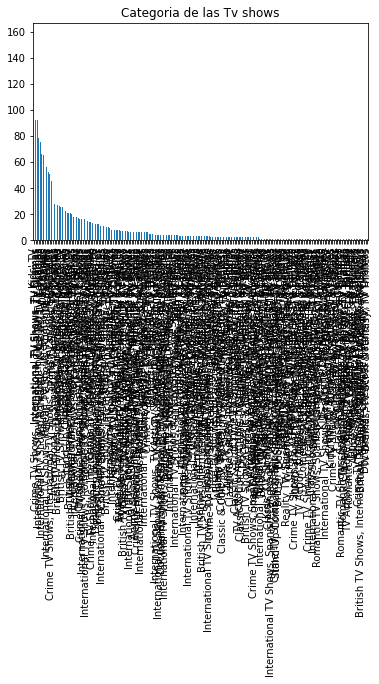

In [42]:
df6["listed_in"].value_counts().plot(kind='bar',
                                     title='Categoria de las Tv shows')
plt.show

### Ejercicio Opcional

Python es un lenguaje de programación muy utilizado en el procesamiento de imágenes. En este ejercicio veremos una aplicación de detección de elementos en una imagen de microscopía de escaneo (en inglés: Scanning Element Microscopy (SEM)).

En esta imagen se puede ver una muestra de vidrio (gris claro) con algunas burbujas (elementos negros) y granos de arena (gris oscuro). Queremos ser capaces de detectar los diferentes elementos de la muestra a partir de la imagen.

Una imagen se puede ver como una matriz bidimensional donde cada elemento de la matriz corresponde al valor de un pixel de la imagen. Por ejemplo, si miramos la matriz de la imagen que os proporcionamos, veremos valores que van de 0 a 255. Así pues, para distinguir los diferentes elementos de la muestra de vidrio, nos tendremos que fijar en el nivel de gris de los píxeles de la imagen a través del histograma. <span style="font-family: Courier New; background-color: #f2ae72; color: #000000; padding: 3px; ">EI</span> 


Parte A: 

* Para poder identificar mejor los elementos de la muestra de vidrio, primero hemos aplicado un filtro de mediana para reducir el ruido. Grafica ahora la distribución de los píxeles de la imagen inicial y la imagen filtrada. ¿Qué diferencia puedes apreciar entre ambas distribuciones?

**Nota:** Utiliza la función [distplot](https://seaborn.pydata.org/generated/seaborn.distplot.html) de la librería Seaborn para visualizar la distribución de los valores píxeles de la imagen.

Parte B: 

* Utilizando los valores del distribution plot de la imagen filtrada, determina unos umbrales que permitan diferenciar los píxeles de arena, los píxeles de vidrio y los píxeles de burbuja.

* Una vez que hayas definido los umbrales, muestra por pantalla una imagen donde cada uno de los elementos esté en un color diferente. 


In [43]:
import seaborn as sns
img = sns.image("/content/SEM_image.jpg")
sns.imgplot(img)

AttributeError: ignored